In [6]:
import matplotlib.pyplot as plt

from wp3_simulate.trip_sampler import *
from macroscopic_traffic_model import Macroscopic_traffic_model
from wp3_simulate.sim import simulate
from wp3_simulate.visualization_utils import *
from shapely.geometry import Polygon

### define simulator/sampler class

In [7]:
dso_code = 'ewz'
sim_start_time, sim_end_time = "2019-01-01", "2019-04-01"
Zurich = Macroscopic_traffic_model(geographical_area = 'Zurich, CH')
SAMPLER = games_trips_sampler(dso_label=dso_code, sim_start_time=sim_start_time, sim_end_time=sim_end_time)

### run sampler

In [8]:
"""------------RUN Roberto's sampler to generate efficiently long horizons matrices of parked vehicles ------------"""
df_sim_ev = SAMPLER.sample_vehicle_connectivity_matrix(sim_start_time=sim_start_time,
                                                       sim_end_time=sim_end_time,
                                                       verbose=1)

Simulating trips using statistical time-to-event sampler
Simulated trip history for the last vehicle number: 495


In [9]:
df_sim_ev.head()

,2019-01-01 00:00:00,2019-01-01 00:15:00,2019-01-01 00:30:00,2019-01-01 00:45:00,2019-01-01 01:00:00,2019-01-01 01:15:00,2019-01-01 01:30:00,2019-01-01 01:45:00,2019-01-01 02:00:00,2019-01-01 02:15:00,...,2019-03-31 21:45:00,2019-03-31 22:00:00,2019-03-31 22:15:00,2019-03-31 22:30:00,2019-03-31 22:45:00,2019-03-31 23:00:00,2019-03-31 23:15:00,2019-03-31 23:30:00,2019-03-31 23:45:00,2019-04-01 00:00:00
vehicle_no,,,,,,,,,,,,,,,,,,,,,
113529,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
113535,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
113941,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
113965,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
113971,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### load user trips (mobility demand scenarios)

In [18]:
acts_path = '../wp3_simulate/data/users/trips_features.csv'
acts_gdf =  simulate.car_sharing_patterns.load_trips(acts_path)

Loaded trips 471350
removed nan geometries and loaded geometry, leftover trips: 471350


### filter by latitude and longitude

In [19]:
target_crs = 'EPSG:4326'  # Example: EPSG code for WGS84
converted_gdf = acts_gdf.to_crs(target_crs)# Convert the GeoDataFrame to the target CRS
# Define the bounding box coordinates for Zurich (example values)
xmin, ymin = 8.4008, 47.2901
xmax , ymax = 8.6182 , 47.4348
# Create a polygon from the bounding box coordinates
area_of_interest = Polygon([(xmin, ymin), (xmin, ymax), (xmax, ymax), (xmax, ymin)])
# Filter the GeoDataFrame based on the intersection with the area of interest
filtered_acts_gdf = acts_gdf[(converted_gdf.geometry.intersects(area_of_interest)) & (converted_gdf['activity_index']==1)]
filtered_converted_acts_gdf = converted_gdf[(converted_gdf.geometry.intersects(area_of_interest)) & (converted_gdf['activity_index']==1)]

In [20]:
person_ids_to_keep = filtered_acts_gdf.person_id
filtered_df = acts_gdf[acts_gdf['person_id'].isin(person_ids_to_keep)]

In [21]:
filtered_df.head()

,person_id,activity_index,start_time_sec_destination,end_time_sec_destination,purpose_destination,is_last,location_id_destination,geom_destination,location_id_origin,geom_origin,...,closest_station_origin,distance_to_station_origin,closest_station_destination,distance_to_station_destination,feat_distance_to_station_origin,feat_distance_to_station_destination,feat_origin_hour,feat_origin_day,feat_destination_hour,feat_destination_day
id,,,,,,,,,,,,,,,,,,,,,
338877,4095946,1,29761.0,62461.0,work,False,16511.0,POINT (2691016.000 1189125.000),-1.0,POINT (2682205.000 1240912.000),...,1505,171.551777,4857,2224.689056,171.551777,2224.689056,18,1,8,1
238450,3522433,1,61373.0,78173.0,leisure,False,41947.0,POINT (2690876.000 1190818.000),-1.0,POINT (2675415.000 1245319.000),...,3225,72.169635,4857,1338.543692,72.169635,1338.543692,21,1,17,1
451016,5044898,1,16608.0,48708.0,work,False,34777.0,POINT (2691128.000 1191125.000),-1.0,POINT (2682396.000 1244455.000),...,3255,134.603734,4857,1079.397902,134.603734,1079.397902,22,1,4,1
249207,3558580,1,32559.0,66039.0,work,False,212738.0,POINT (2691862.000 1193126.000),-1.0,POINT (2687775.000 1245819.000),...,3175,746.915422,5226,170.626150,746.915422,170.626150,17,1,9,1
238411,3521960,1,51030.0,124830.0,leisure,False,432167.0,POINT (2694744.000 1195718.000),-1.0,POINT (2675793.000 1245473.000),...,1965,461.929222,5226,3810.130996,461.929222,3810.130996,18,1,14,1


### save filtered trips

In [ ]:
filtered_acts_gdf.to_csv('wp3_simulate/data/users/trips_features_from_Zurich.csv')

### visualize users, streets and stations

In [24]:
stations_path = "data/station_scenario/Zurich_231.csv"
stations_gdf = sim.simulate.car_sharing_patterns.load_station_scenario(stations_path)

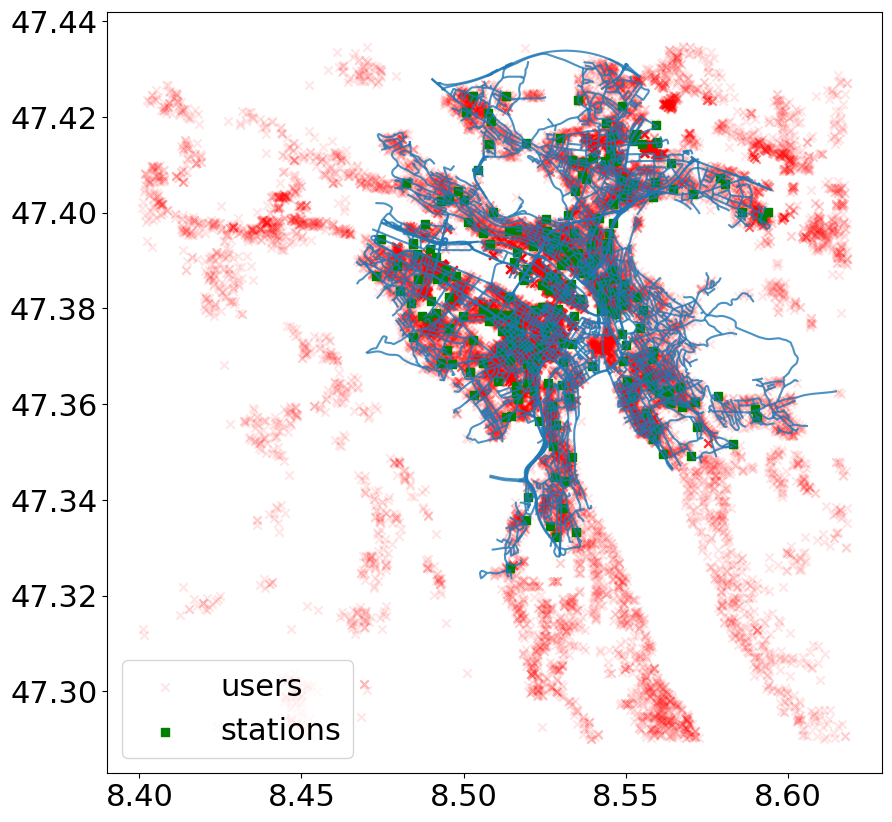

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
Zurich.street.plot(alpha=0.8, ax=ax) # plot street map for Zurich
filtered_converted_acts_gdf.geom_origin.plot(marker='x',c='r', alpha=0.1, label='users', ax=ax) # plot street map for Zurich
plt.scatter(stations_gdf.LON,stations_gdf.LAT,s=30, c='g',marker='s', label ='stations')
#converted_gdf[converted_gdf['person_id'].isin(person_ids_to_keep)].geom_origin.plot(marker='x',c='b', alpha=0.01, ax=ax)
plt.legend()
